In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import os
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Banking analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data=pd.read_csv("banking.csv",encoding='utf-8')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
"""There are 7 categorical value and 14 numerical columns so here first step
is to differentiate all categorical variable and numerical variable
hence we made list of categorical variables and numerical variables"""

In [6]:
categorical_variable=[]
numerical_variables=[]
for i in df.columns:
    if(df[i].dtypes==np.int64 or df[i].dtypes==np.float64):
        numerical_variables.append(i)
    else:
        categorical_variable.append(i)

In [ ]:
"""first we will perform eda on categorical variables"""

Saving figure purchase_fre_job


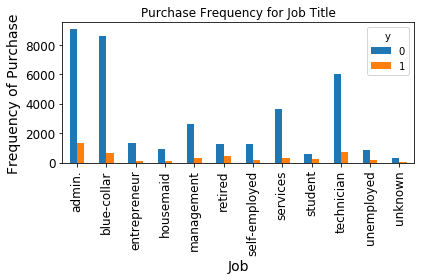

In [9]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
save_fig('purchase_fre_job')

In [ ]:
"""we can say from above graph that admin,blue-collar and technician are 
prominent in above graph this variables are important and are more intrested"""

Saving figure mariral_vs_pur_stack


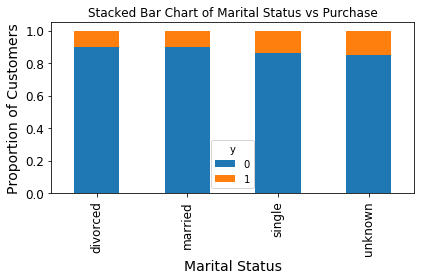

In [11]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
save_fig('mariral_vs_pur_stack')

Saving figure hist_age


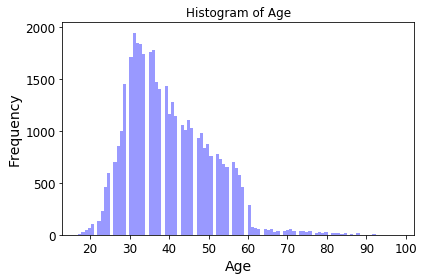

In [12]:
sns.distplot(df.age,kde=False, color='blue', bins=100)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
save_fig('hist_age')

In [ ]:
"""from above graph we come to know following points
a) the category of age 30-40 the intrested rate is high
b) above 60 the intrest rate in term deposit is less"""

Saving figure pur_fre_pout_bar


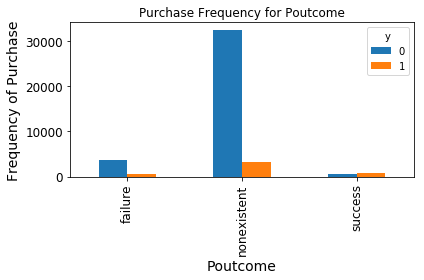

In [13]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
save_fig('pur_fre_pout_bar')

In [ ]:
"""we can see the pOutcome is more prominent"""

Saving figure pur_free_pout_bar


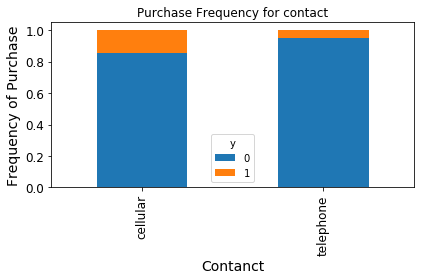

In [14]:
x=pd.crosstab(data.contact,data.y)
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for contact')
plt.xlabel('Contanct')
plt.ylabel('Frequency of Purchase')
save_fig('pur_free_pout_bar')

In [15]:
"""from above plot we come to know the person who contacted by phone is more
than person who contacted by telephone"""

SyntaxError: invalid syntax (<ipython-input-15-5105690457e2>, line 1)

In [16]:
encoder=LabelEncoder()
for i in categorical_variable:
    df[i]=encoder.fit_transform(df[i])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,4,0,0,0,2,0,0,3,3,...,8,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0
6,37,1,1,0,0,2,0,0,6,2,...,1,999,0,1,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,1,0,2,0,2,0,0,6,0,...,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,0,1,6,0,0,0,0,4,1,...,1,3,1,2,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,1,2,0,0,2,0,0,0,2,...,2,999,1,0,-1.8,93.075,-47.1,1.410,5099.1,0


In [21]:
"""Eda on numerical variables"""
df1=pd.DataFrame()
for i in numerical_variables:
    df1[i]=df[i]
df1

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,0
6,37,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,174,1,3,1,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,191,2,999,1,-1.8,93.075,-47.1,1.410,5099.1,0


In [22]:
missing_values=df1.isnull()

Saving figure missing values


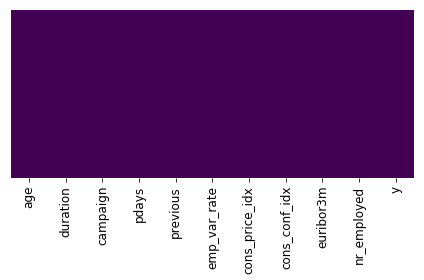

In [24]:
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')
save_fig("missing values")

In [25]:
"""from above graph we realize that there is no missing values
else there will be yellow mark if there is missing values ndicating
frequency of missing values"""

'from above graph we realize that there is no missing values\nelse there will be yellow mark if there is missing values ndicating\nfrequency of missing values'

In [27]:
df1.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [28]:
"""since there is no column with std variance =0 we cannot drop any columns
hence from categorical variable we drop following columns
as they have less dependency on output values"""

'since there is no column with std variance =0 we cannot drop any columns\nhence from categorical variable we drop following columns\nas they have less dependency on output values'

In [29]:
df.drop(["day_of_week","month","duration","pdays","previous"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
age               41188 non-null int64
job               41188 non-null int32
marital           41188 non-null int32
education         41188 non-null int32
default           41188 non-null int32
housing           41188 non-null int32
loan              41188 non-null int32
contact           41188 non-null int32
campaign          41188 non-null int64
poutcome          41188 non-null int32
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int32(8), int64(3)
memory usage: 3.8 MB


In [30]:
"""so are next step is to making all int variable in float""" 

'so are next step is to making all int variable in float'

In [33]:
for i in df.columns:
    if(df[i].dtypes==np.int32 or df[i].dtypes==np.int64):
        df[i]=df[i].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
age               41188 non-null float64
job               41188 non-null float64
marital           41188 non-null float64
education         41188 non-null float64
default           41188 non-null float64
housing           41188 non-null float64
loan              41188 non-null float64
contact           41188 non-null float64
campaign          41188 non-null float64
poutcome          41188 non-null float64
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null float64
dtypes: float64(16)
memory usage: 5.0 MB


Saving figure corelation daigram


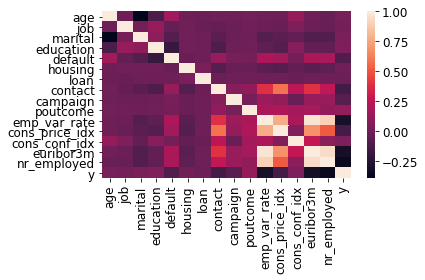

In [34]:
corr = df.corr()
# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
save_fig("corelation daigram")

In [35]:
"""model training starts from here"""

'model training starts from here'

In [36]:
x=df.drop("y",axis=1)
y=df["y"]

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
log_clf = LogisticRegression(C=89,random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=800, random_state=0,max_features=6)
#svm_clf = SVC(gamma="auto", random_state=0)
knn_clf=KNeighborsClassifier(metric="euclidean",n_neighbors=7)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [45]:
voting_clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=89, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomForest...an',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [49]:
for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.900623128591082
RandomForestClassifier 0.8962531358744031
KNeighborsClassifier 0.8903455531277819


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.90102775754633


In [50]:
"""so from above results we come to know that
we can use logistic regression as it has high accuracy i.e 90.6"""

'so from above results we come to know that\nwe can use logistic regression as it has high accuracy i.e 90.6'

In [51]:
model=log_clf.fit(x_train,y_train)
ypred=model.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
cm=confusion_matrix(y_test,ypred)
print(cm)
score=accuracy_score(y_test,ypred)
print(score)

[[10816   165]
 [ 1063   313]]
0.900623128591082


Saving figure confusion-matrix


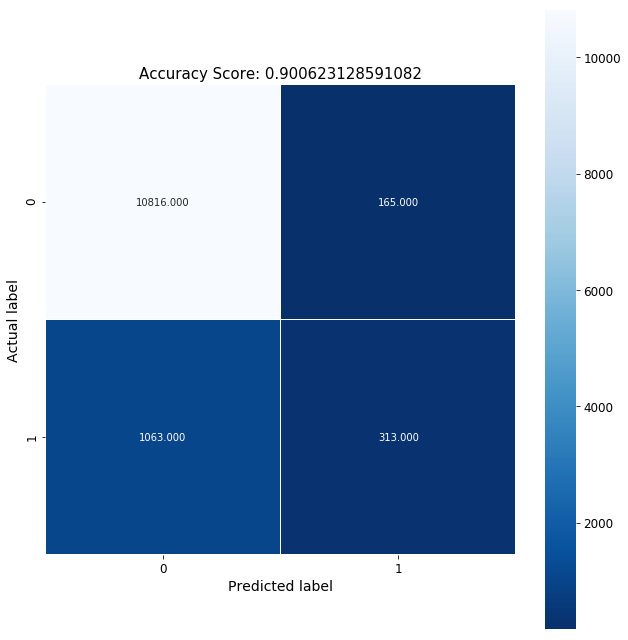

In [54]:

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
save_fig("confusion-matrix")

In [101]:
accuracy_score(y_test,ypred)

0.900623128591082

In [55]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     10981
         1.0       0.65      0.23      0.34      1376

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.78      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357



AUC: 0.776


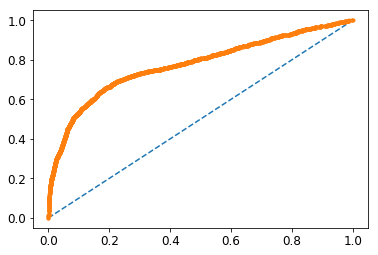

Saving figure roc curve


<Figure size 432x288 with 0 Axes>

In [56]:

probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
save_fig("roc curve")

f1=0.338 auc=0.776 ap=0.445


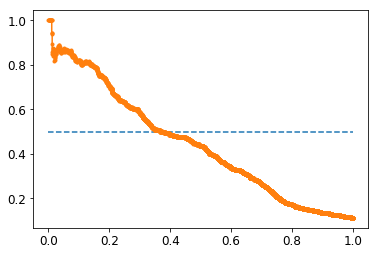

Saving figure precision recall curve


<Figure size 432x288 with 0 Axes>

In [57]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, ypred)
# calculate precision-recall AUC
#auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
%matplotlib inline
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot

plt.show()
save_fig("precision recall curve")

In [58]:
df1=pd.DataFrame(y_test)
df1['predicted']=ypred
df1.to_csv("finalresult.csv")

In [106]:
param_grid=[{'n_estimators':[100,200,300],'max_features':[6,8,12,14]}]
grid_search=GridSearchCV(rnd_clf,param_grid,cv=5)